In [46]:
%load_ext autoreload 
%autoreload 2
import os
from IPython.display import Audio
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torchaudio
print(plt.style.available)
plt.style.use("seaborn-v0_8")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [16]:
libspeech_path = os.path.join("/mnt/dl/NLP/LJSpeech-1.1")
os.listdir(libspeech_path)

['metadata.csv', 'README', 'wavs']

In [17]:
text = pd.read_csv(os.path.join(libspeech_path, "metadata.csv"), delimiter="|", names=["audio_id", "text", "text_normalized"])
text

,audio_id,text,text_normalized
0,LJ001-0001,"Printing, in the only sense with which we are ...","Printing, in the only sense with which we are ..."
1,LJ001-0002,in being comparatively modern.,in being comparatively modern.
2,LJ001-0003,For although the Chinese took impressions from...,For although the Chinese took impressions from...
3,LJ001-0004,"produced the block books, which were the immed...","produced the block books, which were the immed..."
4,LJ001-0005,the invention of movable metal letters in the ...,the invention of movable metal letters in the ...
...,...,...,...
13095,LJ050-0274,made certain recommendations which it believes...,made certain recommendations which it believes...
13096,LJ050-0275,materially improve upon the procedures in effe...,materially improve upon the procedures in effe...
13097,LJ050-0276,"As has been pointed out, the Commission has no...","As has been pointed out, the Commission has no..."
13098,LJ050-0277,with the active cooperation of the responsible...,with the active cooperation of the responsible...


In [18]:
sample_train = text.iloc[0]
sample_train

audio_id                                                  LJ001-0001
text               Printing, in the only sense with which we are ...
text_normalized    Printing, in the only sense with which we are ...
Name: 0, dtype: object

In [19]:
sample_audio_path = os.path.join(libspeech_path, "wavs", sample_train["audio_id"] + ".wav")
sample_audio_path

'/mnt/dl/NLP/LJSpeech-1.1/wavs/LJ001-0001.wav'

In [20]:
sample_info = torchaudio.info(sample_audio_path)

In [21]:
torchaudio.info

<function torchaudio.backend.sox_io_backend.info(filepath: str, format: Optional[str] = None) -> torchaudio.backend.common.AudioMetaData>

In [22]:
sample_info

In [23]:
sample_info.__dict__

{'sample_rate': 22050,
 'num_frames': 212893,
 'num_channels': 1,
 'bits_per_sample': 16,
 'encoding': 'PCM_S'}

In [24]:
waveform, sample_rate = torchaudio.load(sample_audio_path)

In [25]:
waveform

tensor([[-7.3242e-04, -7.6294e-04, -6.4087e-04,  ...,  7.3242e-04,
          2.1362e-04,  6.1035e-05]])

In [26]:
waveform.size()

torch.Size([1, 212893])

In [27]:
waveform.max()

tensor(0.8649)

In [32]:
nsonds = sample_info.num_frames / sample_info.sample_rate # total seconds
nsonds

9.65501133786848

In [31]:
1000/ sample_rate # ms

0.045351473922902494

In [33]:
0.05 * 212893

10644.650000000001

In [38]:
def plot_waveform(waveform: torch.Tensor, sample_rate: int):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    fig, ax = plt.subplots()
    assert num_channels == 1
    ax.plot( time_axis, waveform[0])
    

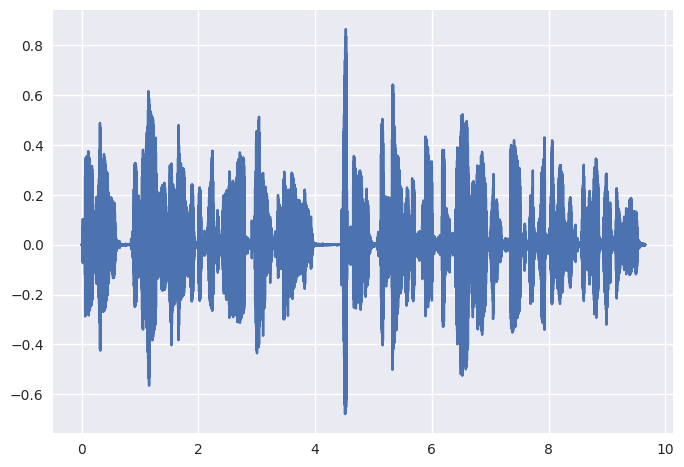

In [39]:
plot_waveform(waveform, sample_rate)

In [42]:
def plot_spectogram(waveform, sample_rate):
    waveform = waveform.numpy()
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    fig, ax = plt.subplots()
    assert num_channels == 1
    ax.specgram(waveform[0], Fs=sample_rate, cmap="viridis")
    

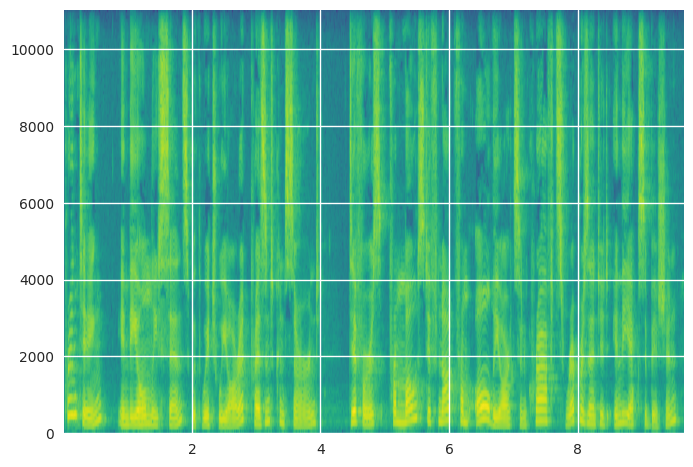

In [43]:
plot_spectogram(waveform, sample_rate)

In [47]:
Audio(waveform, rate=sample_rate)

In [49]:
Audio(torchaudio.load(sample_audio_path, frame_offset=50000, num_frames=50000)[0], rate=sample_rate)

In [51]:
# is same as above
Audio(waveform[:, 50000: 50000 + 50000], rate=sample_rate)